Building convential neutral network

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras

Load the data from the keras

In [46]:
(X_train,y_train),(X_test,y_test) = keras.datasets.fashion_mnist.load_data()

In [47]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [48]:
y_train[0]

9

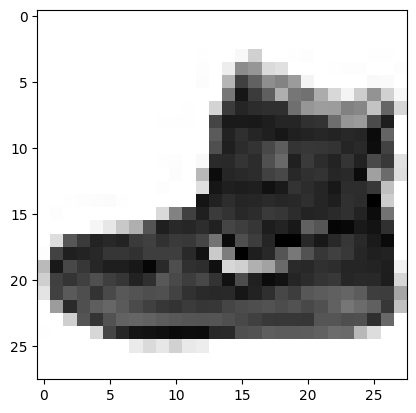

In [49]:
plt.imshow(X_train[0],cmap= 'Greys')

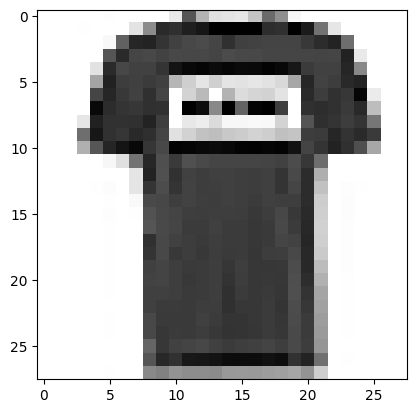

In [50]:
plt.imshow(X_train[1],cmap= 'Greys')

In [51]:
class_labels = ['T-shirt/top','Trousers','Pullover','Dress','Coat','Sandal','Shirt','Sneakers','Bag','Ankle boot',
                '''
                0=> T-shirt/top
                1=> Trousers
                2=>Pullover
                3=>Dress
                4=>Coat
                5=>Sandal
                6=>Shirt
                7=>Sneakers
                8=>Bag
                9=>Ankle boot
                ''']

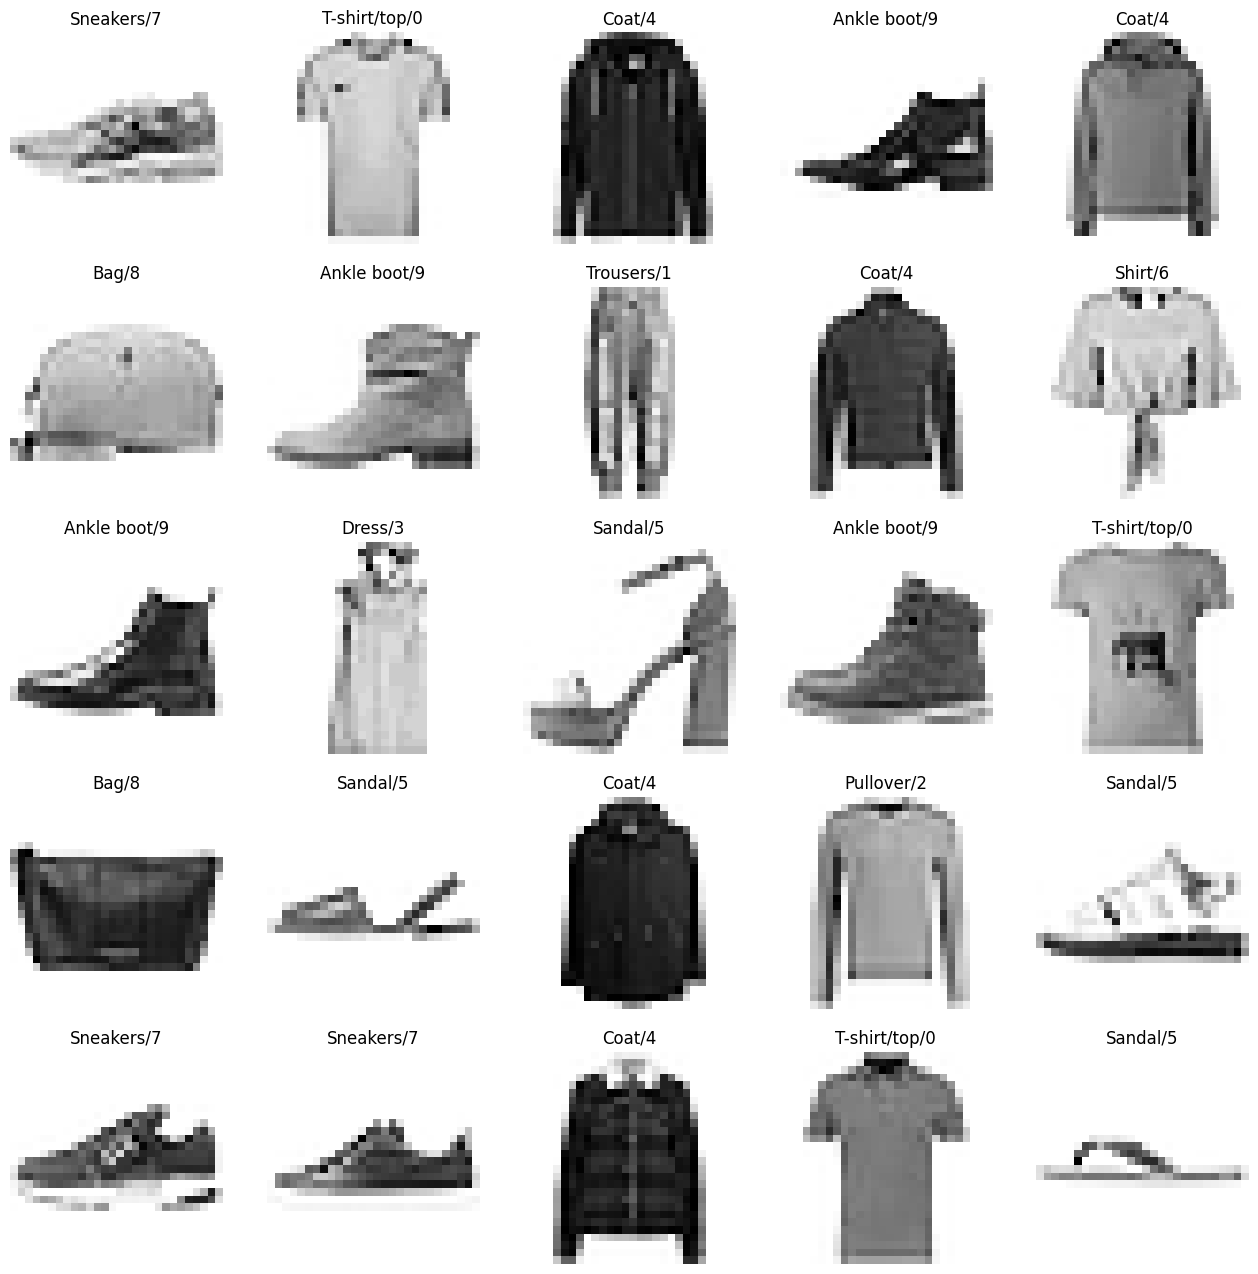

In [52]:
plt.figure(figsize=(16,16))
j=1
for i in np.random.randint(0,1000,25):
  plt.subplot(5,5,j); j+=1
  plt.imshow(X_train[i],cmap="Greys")
  plt.axis('off')#off the axis
  plt.title('{}/{}'.format(class_labels[y_train[i]],y_train[i]))

Change dimension

In [53]:
X_train.ndim

3

In [54]:
X_train=np.expand_dims(X_train,-1)
X_test=np.expand_dims(X_test,-1)

In [55]:
X_train.shape

(60000, 28, 28, 1)

Feature Scaling

In [56]:
X_train=X_train/255
X_test=X_test/255


In [57]:
from sklearn.model_selection  import train_test_split
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.2,random_state=2)

Convolutional Neural Network -Model Building

In [58]:
 model=keras.models.Sequential([
                         keras.layers.Conv2D(filters=32,kernel_size=3, strides=(1,1),padding='valid',activation='relu',input_shape=[28,28,1]),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Flatten(),
                         keras.layers.Dense(units=128,activation='relu'),
                         keras.layers.Dense(units=10,activation='softmax'),

])

In [59]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [60]:
model.fit(X_train,y_train,epochs=10,batch_size=256,verbose=1,validation_data=(X_val,y_val))

Epoch 1/10
188/188 [==============================] - 7s 31ms/step - loss: 0.5414 - accuracy: 0.8169 - val_loss: 0.3814 - val_accuracy: 0.8627
Epoch 2/10
188/188 [==============================] - 6s 30ms/step - loss: 0.3341 - accuracy: 0.8836 - val_loss: 0.3039 - val_accuracy: 0.8930
Epoch 3/10
188/188 [==============================] - 6s 31ms/step - loss: 0.2899 - accuracy: 0.8964 - val_loss: 0.2906 - val_accuracy: 0.8965
Epoch 4/10
188/188 [==============================] - 6s 30ms/step - loss: 0.2620 - accuracy: 0.9062 - val_loss: 0.2806 - val_accuracy: 0.8978
Epoch 5/10
188/188 [==============================] - 6s 30ms/step - loss: 0.2379 - accuracy: 0.9147 - val_loss: 0.2700 - val_accuracy: 0.9022
Epoch 6/10
188/188 [==============================] - 6s 30ms/step - loss: 0.2207 - accuracy: 0.9206 - val_loss: 0.3042 - val_accuracy: 0.8873
Epoch 7/10
188/188 [==============================] - 6s 30ms/step - loss: 0.2085 - accuracy: 0.9255 - val_loss: 0.2600 - val_accuracy: 0.9051

In [61]:
model.summary

<bound method Model.summary of <keras.src.engine.sequential.Sequential object at 0x000001591D1A5190>>

In [62]:
model.predict(np.expand_dims(X_test[0],axis=0)).round(2)

1/1 [==============================] - 0s 59ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.99]],
      dtype=float32)

In [63]:
np.argmax(model.predict(np.expand_dims(X_test[0],axis=0)).round(2))

1/1 [==============================] - 0s 35ms/step


9

In [64]:
y_test[0]

9

In [65]:
y_pred=model.predict(X_test).round(2)

313/313 [==============================] - 1s 2ms/step


In [66]:
y_pred

array([[0.  , 0.  , 0.  , ..., 0.01, 0.  , 0.99],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.37, 0.01, 0.01]], dtype=float32)

In [67]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2547 - accuracy: 0.9078


[0.2546638250350952, 0.907800018787384]

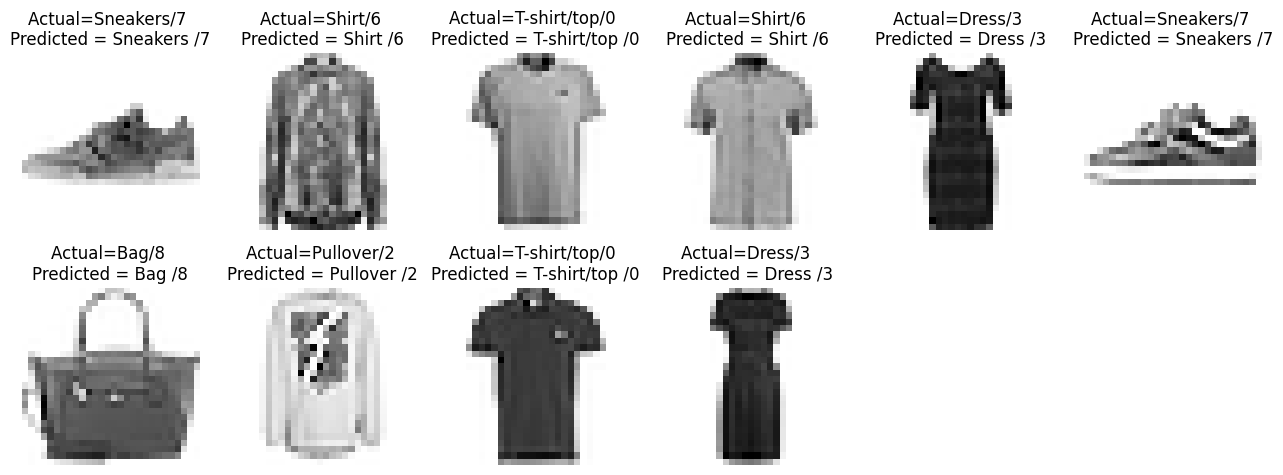

In [68]:
plt.figure(figsize=(16, 30))

j = 1
for i in np.random.randint(0, 1000, 60):
    plt.subplot(10, 6, j)
    plt.imshow(X_test[i].reshape(28, 28), cmap="Greys")
    plt.axis('off')
    plt.title('Actual={}/{} \nPredicted = {} /{}'.format(class_labels[y_test[i]], y_test[i], class_labels[np.argmax(y_pred[i])], np.argmax(y_pred[i])))
    plt.axis('off')
    
    j += 1
    if j == 11:
        j = 1


In [70]:
model.save('model.h5')

c:\Users\param\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


ValueError: Number of classes, 10, does not match size of target_names, 11. Try specifying the labels parameter

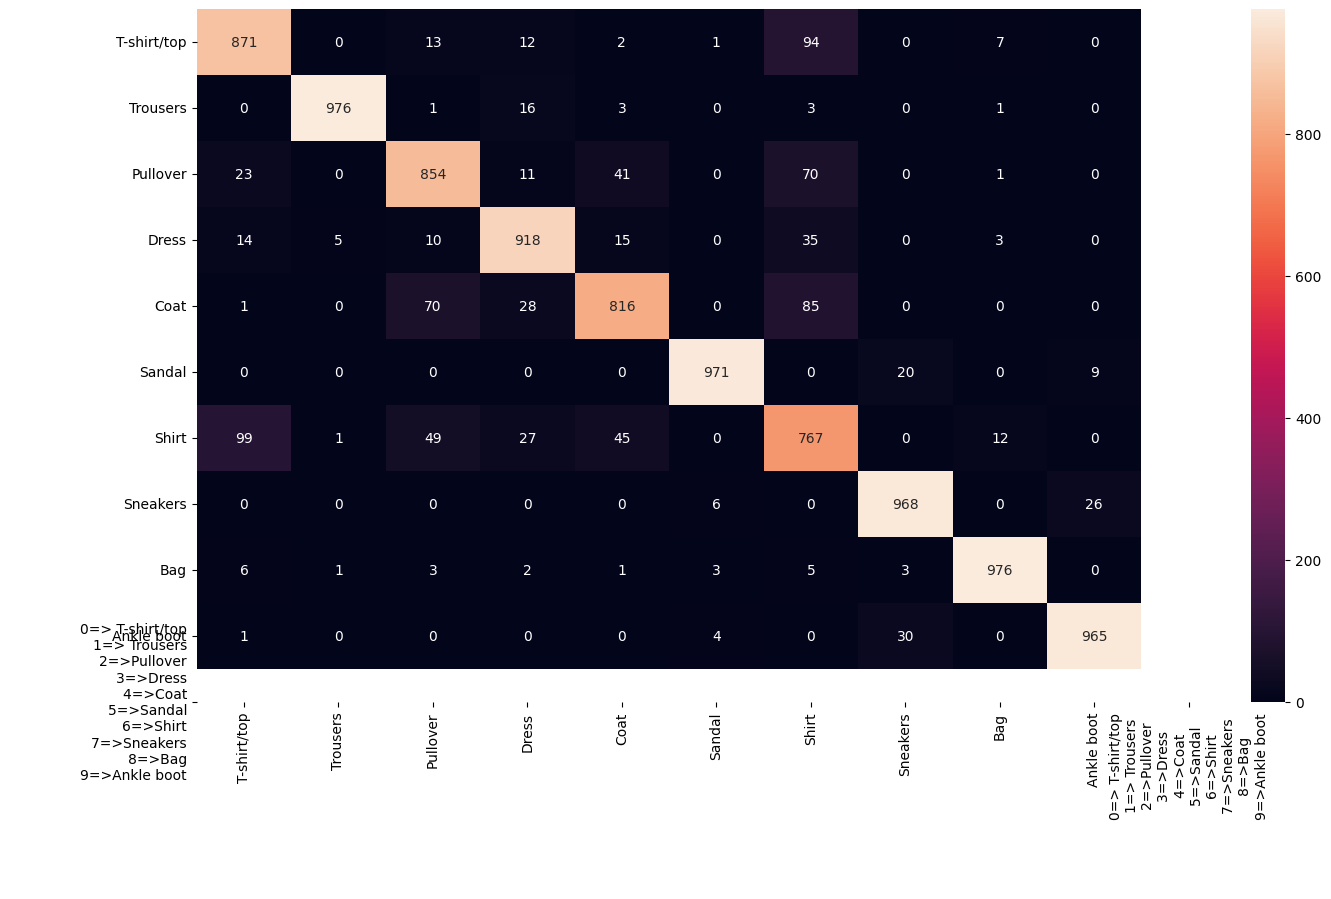

In [69]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(16,9))
y_pred_labels = [np.argmax(label) for label in y_pred]
cm = confusion_matrix(y_test,y_pred_labels)
sns.heatmap(cm,annot=True,fmt='d',xticklabels=class_labels,yticklabels=class_labels)
from sklearn.metrics import classification_report
cr= classification_report(y_test,y_pred_labels,target_names=class_labels)